# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
#Загружаем данные в удобном для чтения формате.
import pandas as pd
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('C:/Users/Suntory1/Downloads/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

In [2]:
#Изучаем общую информацию о полученном датафрейме.
pd.set_option('display.max_columns', 30)
data.head(20)
#Видно, что в датафрейме есть пропущенные значения.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()
#В датафрейме 22 столбца и 23699 строк. Во многих столбцах есть пропущенные значения.
#У одного столбца неверный тип данных: даты из столбца first_day_exposition записаны в строковом формате.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.describe() 
#Сравнение показателей min, max с медианой может помочь в нахождении аномалий 
#таких, как 0 комнат в столбце rooms или высота потолков в ceiling_height от 1 метра до 100 метров.

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [5]:
data.duplicated().sum() 
#Проверка на дубликаты показала отсутствие дубликатов.

0

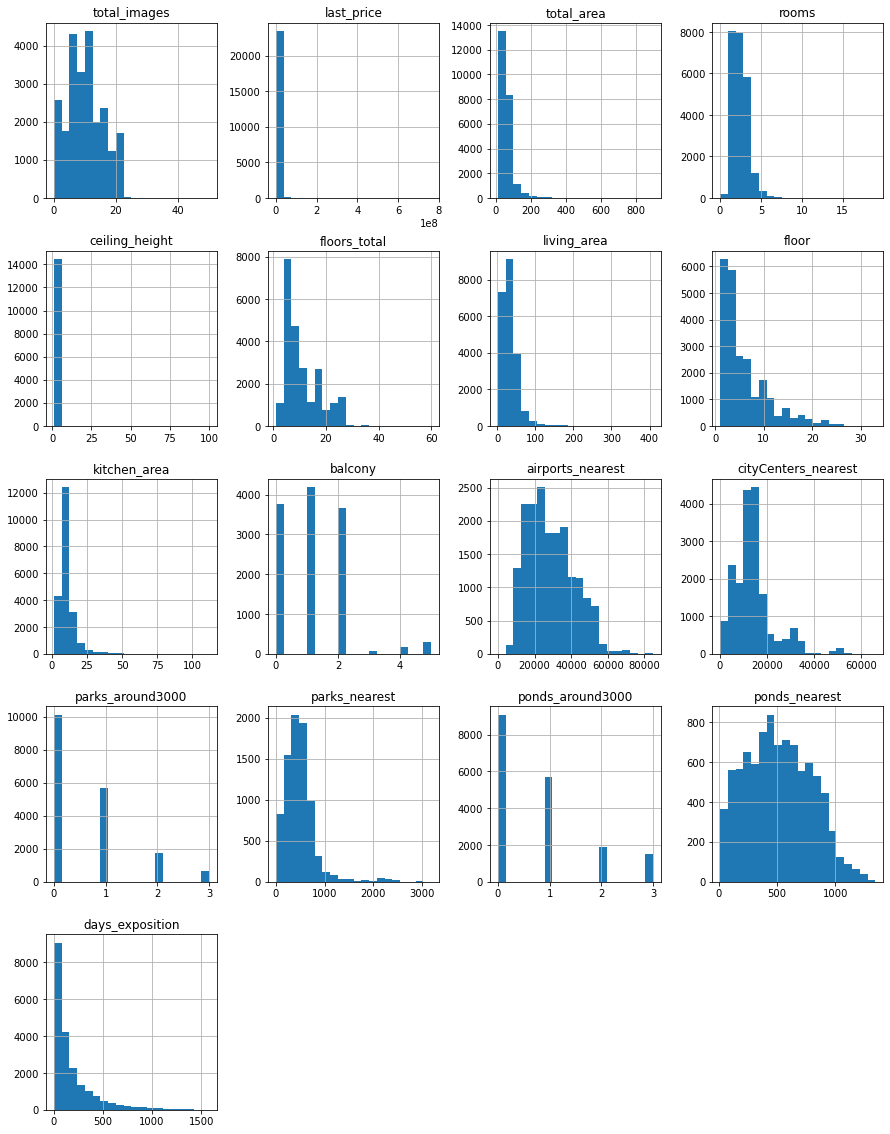

In [6]:
#Строим гистограммы по всем столбцам.
data.hist(figsize=(15, 20), bins=20);

**Знакомство с данными:**
В датасете обнаружены недочеты, требующие исправлений: пропущенные значения и аномалии.

### Предобработка данных

In [7]:
#Проверяем наличие пропущенных значений в столбцах.
data.isnull().sum().sort_values() 
#В 14 из 22 столбцов встречаются пропуски. 

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

In [8]:
data.isnull().sum().sort_values()/data.shape[0] * 100 
#В некоторых столбцах, например в is_apartment, пропуски составляют более половины всех значений. 
#Такое количество пропусков нельзя удалять, поскольку это повлияет на анализ данных.

total_images             0.000000
open_plan                0.000000
floor                    0.000000
rooms                    0.000000
studio                   0.000000
total_area               0.000000
last_price               0.000000
first_day_exposition     0.000000
locality_name            0.206760
floors_total             0.362885
living_area              8.029875
kitchen_area             9.612220
days_exposition         13.422507
ponds_around3000        23.283683
parks_around3000        23.283683
cityCenters_nearest     23.287902
airports_nearest        23.384953
ceiling_height          38.799105
balcony                 48.605426
ponds_nearest           61.559559
parks_nearest           65.909954
is_apartment            88.290645
dtype: float64

In [9]:
#Попытаемся понять с чем связаны пропуски в столбце floors_total.
data[data['floors_total'].isna()] 
#Объекты, для которых в столбце floors_total указано значения NaN, расположены в том числе в многоэтажных зданиях. 
#Следовательно в данном случае NaN не может обозначать, что объект находится на первом этаже.
#Однако значения NaN, указанные в столбце floors_total, составляют всего лишь 86 из 23699. Следовательно ими можно пренебречь.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.8,NaN,NaN,3,NaN,False,False,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,NaN,NaN,31.70,20,NaN,False,False,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,NaN,NaN,45.38,6,NaN,False,False,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,NaN,NaN,50.40,18,NaN,False,False,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


In [10]:
#Изучим пропуски в столбце days_exposition.
data[data['days_exposition'].isna()] 
#Для объектов с указанными в столбце days_exposition значениями NaN, имеются даты выставления объектов на продажу. 
#Следовательно в этом случае NaN означает либо то, что объект ещё не был продан на момент выгрузки данных, либо отсутствие соответствующей информации.
#Таким образом в данном столбце замена NaN на 0 невозможна.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.60,2018-12-02T00:00:00,2,2.65,9.0,30.3,7,NaN,False,False,7.00,NaN,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.10,2019-01-31T00:00:00,2,2.60,24.0,29.7,9,NaN,False,False,8.30,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,NaN,False,False,15.60,NaN,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.00,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,NaN,False,False,5.60,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Проверим на пропуски столбец ceiling_height.
data['ceiling_height'].isna().sum()

9195

In [12]:
#Рассчитаем медиану потолков.
median_height = data['ceiling_height'].median()
#Медиана, полученная на наших данных, совпадает с требованиями ГОСТов РФ.

In [13]:
#Заменим пропущенные значения высот на медиану.
data['ceiling_height'] = data['ceiling_height'].fillna(median_height)

In [14]:
#Проверим остались ли пропуски в ceiling_height.
data['ceiling_height'].isna().sum()

0

In [15]:
#Изучим пропуски в столбце is_apartment.
data['is_apartment'].isna().sum() 
#В столбце is_apartment значения NaN встречаются в 20924 строках из 23699. 
#По-видимому в данном случае NaN означает, что объект не является апартаментами. Следовательно NaN можно заменить на False.

20924

In [16]:
#Заменим пропуски в столбце is_apartment.
data['is_apartment'] = data['is_apartment'].fillna(False) 

In [17]:
#Проверим замену пропусков в столбце is_apartment.
data['is_apartment'].value_counts() 
#Пропуски заменены.

False    23649
True        50
Name: is_apartment, dtype: int64

In [18]:
data['balcony'].unique() 
#В столбце balcony значения NaN по-видимому обозначают отсутствие балкона. Следовательно их можно заменить на 0.

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [19]:
#Заменим пропуски в столбце balcony.
data['balcony'] = data['balcony'].fillna(0) 

In [20]:
#Проверим замену пропусков в столбце balcony.
data['balcony'].value_counts() 

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

**Пропущенные значения:**
Из 22 столбцов в 14 обнаружены пропущенные значения. В 3 столбцах данные удалось заменить.В остальных столбцах значения NaN обозначают количество, расстояние или название населенного пункта и поэтому не могут быть заменены на 0. 
Появление пропусков отчасти связано с тем, что значения NaN использовались для обозначения нулевого количества или значения "False". На появление пропусков в данных также могли повлиять копирование и хранение данных.

In [21]:
data.dtypes 
#Проверим типы данных столбцов. Видно, что даты из first_day_exposition записаны в строковом формате.

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [22]:
#Поменяем тип данных в first_day_exposition
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d') 

In [23]:
#Проверим, поменялся ли тип данных.
data['first_day_exposition'].dtypes 

dtype('<M8[ns]')

**Изменение типов данных:** 
Тип данных столбца first_day_exposition был изменён, поскольку столбец содержал в себе даты, но был в строковом формате. Теперь он во временном формате, благодаря чему со столбцом можно проводить различные операции.

In [24]:
#Проверяем столбец locality_name на наличие неявных дубликатов.
list(data['locality_name'].unique())  
#В списке присутствуют разные названия одного и того же населённого пункта.

['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

In [25]:
len(data['locality_name'].unique()) 
#В изначальном датафрейме 365 населённых пунктов.

365

In [26]:
#Приводим к единому написанию слово "поселок".
data['locality_name'] = data['locality_name'].str.replace('ё','е', regex= True) 

In [27]:
#Убираем словосочетание "городского типа".
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','поселок', regex= True) 

In [28]:
#Убираем слово "железнодорожная".
data['locality_name'] = data['locality_name'].str.replace('железнодорожной','', regex= True) 

In [29]:
#Проверяем количество оставшихся населённых пунктов.
len(data['locality_name'].unique()) 
#Количество уникальных населённых пунктов сократилось до 330.

330

**Удаление неявных дубликатов:**
Были унифицированы названия населённых пунктов, вследствие чего их количество сократилось на 35 штук.

In [30]:
#Выведем основные численные показатели для основных характеристик квартир.
data[['last_price', 'total_area']].describe()
#Видно, что максимальные показатели в десятки и сотни раз отличаются от медианы. 
#Это возможно, если в датафрейме есть небольшое количество объектов недвижимости с очень нестандартными характеристиками.

,last_price,total_area
count,2.369900e+04,23699.000000
mean,6.541549e+06,60.348651
std,1.088701e+07,35.654083
min,1.219000e+04,12.000000
25%,3.400000e+06,40.000000
50%,4.650000e+06,52.000000
75%,6.800000e+06,69.900000
max,7.630000e+08,900.000000


In [31]:
#Избавимся от аномалий в стоимости квартир.
q_low = data['last_price'].quantile(0.005)
q_high = data['last_price'].quantile(0.995)
iqr = q_high - q_low
temp_data = data[(data['last_price'] > q_low - 1.5 * iqr)&(data['last_price'] < q_high + 1.5 * iqr)]

In [32]:
#Проверим изменения.
temp_data.describe()
#Видно, что максимальное значение приблизилось к медиане.

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23678.000000,2.367800e+04,23678.00000,23678.000000,23678.000000,23592.000000,21779.000000,23678.000000,21404.00000,23678.000000,18136.000000,18159.000000,18160.000000,8066.000000,18160.000000,9090.000000,20501.00000
mean,9.853831,6.332324e+06,60.06212,2.067447,2.723953,10.676712,34.326776,5.891714,10.54398,0.591182,28796.195633,14203.019054,0.610518,490.915696,0.768667,518.394059,180.80079
std,5.680960,7.136318e+06,33.91759,1.071647,0.988451,6.598167,21.413411,4.885513,5.80282,0.959338,12637.142124,8606.161710,0.800978,342.501344,0.937239,277.748624,219.68103
min,0.000000,1.219000e+04,12.00000,0.000000,1.000000,1.000000,2.000000,1.000000,1.30000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.00000
25%,6.000000,3.400000e+06,40.00000,1.000000,2.600000,5.000000,18.600000,2.000000,7.00000,0.000000,18576.000000,9252.000000,0.000000,288.000000,0.000000,295.000000,45.00000
50%,9.000000,4.648500e+06,52.00000,2.000000,2.650000,9.000000,30.000000,4.000000,9.10000,0.000000,26732.500000,13107.000000,0.000000,455.000000,1.000000,503.000000,95.00000
75%,14.000000,6.774440e+06,69.70000,3.000000,2.700000,16.000000,42.300000,8.000000,12.00000,1.000000,37288.000000,16295.000000,1.000000,612.000000,1.000000,730.000000,231.00000
max,50.000000,1.350000e+08,590.00000,19.000000,100.000000,60.000000,409.000000,33.000000,107.00000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.00000


In [33]:
#Проверим объём полученного датафрейма
temp_data.shape
#Исходный датафрейм сократился на 22 строки

(23678, 22)

In [34]:
#Проверим объём "потерь" в данных.
temp_data.shape[0] / data.shape[0]

0.9991138866618845

In [35]:
#Переприсвоим датасет.
data = temp_data

In [36]:
#Избавимся от аномалий в общей площади квартир.
q_low = data['total_area'].quantile(0.005)
q_high = data['total_area'].quantile(0.995)
iqr = q_high - q_low
temp_data = data[(data['total_area'] > q_low - 1.5 * iqr)&(data['total_area'] < q_high + 1.5 * iqr)]

In [37]:
#Проверим изменения в данных.
temp_data.describe()
#Видно, что максимальное значение значительно приблизилось к медиане.

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23677.000000,2.367700e+04,23677.000000,23677.000000,23677.000000,23591.000000,21778.000000,23677.000000,21403.000000,23677.000000,18135.000000,18158.000000,18159.000000,8065.000000,18159.000000,9090.000000,20500.000000
mean,9.853402,6.329846e+06,60.039738,2.066900,2.723920,10.676911,34.309572,5.891836,10.539800,0.591207,28796.435456,14203.544278,0.610496,490.881463,0.768710,518.394059,180.808927
std,5.680697,7.126276e+06,33.742991,1.068368,0.988459,6.598237,21.262847,4.885580,5.770647,0.959351,12637.449285,8606.107654,0.800995,342.508780,0.937247,277.748624,219.683299
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18576.000000,9252.250000,0.000000,288.000000,0.000000,295.000000,45.000000
50%,9.000000,4.647000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26736.000000,13107.000000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.772762e+06,69.700000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37288.000000,16295.500000,1.000000,612.000000,1.000000,730.000000,231.250000
max,50.000000,1.350000e+08,517.000000,19.000000,100.000000,60.000000,347.500000,33.000000,107.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [38]:
#Проверим объём полученного датафрейма
temp_data.shape
#Исходный датафрейм сократился ещё на 1 строчку.

(23677, 22)

In [39]:
#Проверим объём "потерь" в данных.
temp_data.shape[0] / data.shape[0]

0.9999577667032689

In [40]:
#Переприсвоим датасет.
data = temp_data

In [41]:
#Изучим столбец rooms.
data['rooms'].unique() 
#В данном столбце по какой-то причине присутствует "0 комнат". Возможно, это обозначение квартир-студий.

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10,  9, 19, 16],
      dtype=int64)

In [42]:
data[(data['rooms']==0)&(data['studio']==False)] 
#Присутствует 58 не-студий с нулём комнат. Вероятно, это студии, которые были ошибочно обозначены как не-студии.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
349,4,2320000.0,25.00,2017-09-27,0,2.65,14.0,17.0,1,False,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
508,0,3375000.0,34.40,2017-03-28,0,2.65,26.0,24.3,19,False,False,True,NaN,1.0,поселок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
780,9,2600000.0,26.10,2018-02-20,0,2.65,18.0,NaN,8,False,False,True,NaN,1.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
839,14,1900000.0,35.00,2017-04-14,0,2.70,5.0,15.0,3,False,False,True,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
946,5,2200000.0,23.00,2016-09-27,0,2.65,27.0,18.0,7,False,False,True,NaN,2.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0
1574,0,2200000.0,22.00,2017-11-03,0,2.65,18.0,15.0,16,False,False,True,NaN,1.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,81.0
1625,7,1980000.0,23.98,2018-02-01,0,2.65,4.0,10.5,3,False,False,True,NaN,1.0,поселок станции Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.0
2532,5,3500000.0,27.10,2018-02-01,0,2.65,18.0,18.7,9,False,False,True,NaN,2.0,Санкт-Петербург,32036.0,8175.0,0.0,NaN,1.0,644.0,70.0
3019,18,2100000.0,24.00,2017-11-10,0,2.65,10.0,18.0,6,False,False,True,NaN,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4115,7,2600000.0,24.00,2018-02-01,0,2.65,25.0,18.0,4,False,False,True,NaN,2.0,Санкт-Петербург,10031.0,13330.0,1.0,915.0,0.0,NaN,42.0


In [43]:
#Будем считать студиями все квартиры с нулём комнат.
data.loc[data['rooms']==0, 'studio'] = True 

In [44]:
#Проверяем отсутствие не-студий с нулём комнат.
data[(data['rooms']==0)&(data['studio']==False)] 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [45]:
#Изучим столбец ceiling_height.
data['ceiling_height'].value_counts().sort_values() 
#Наиболее частотная высота потолков - 2,5 метра. Однако есть выбросы, по-видимому, ошибочные, например, высота в 1 метр.

3.59        1
2.49        1
6.00        1
3.76        1
22.60       1
         ... 
3.00     1111
2.70     1574
2.60     1646
2.50     3515
2.65     9862
Name: ceiling_height, Length: 183, dtype: int64

In [46]:
# Избавимся от аномалий в высотах потолков. 
q_low = data['ceiling_height'].quantile(0.005)
q_high = data['ceiling_height'].quantile(0.995)
iqr = q_high - q_low
temp_data = data[(data['ceiling_height'] > q_low - 1.5 * iqr )&(data['ceiling_height'] < q_high + 1.5 * iqr)]

In [47]:
#Проверяем объём оставшегося датасета.
temp_data.shape
#Исходный датафрейм сократился ещё на 29 строк.

(23648, 22)

In [48]:
#Переприсвоим датасет.
data = temp_data

**Аномальные значения:**
В нескольких столбцах были обнаружены выбивающиеся значения. 
Был сформирован датасет с более типичными значениями last_price и total_area и проверен объём потерь в датасете. 
В столбце rooms было обнаружено количество комнат, равное нулю, что по-видимому обозначает квартиру-студию. Были произведены соответствующие изменения. 
В столбце ceiling_height были обнаружены невозможно низкие и высокие значения высот потолков. В датафрейме были оставлены только высоты, соответствующие нормальному распределению.

In [49]:
#код ревьюера
data.shape

(23648, 22)

### Посчитайте и добавьте в таблицу новые столбцы

In [50]:
#Добавим столбцы year, month, day.
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year 
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

In [51]:
#Добавим столбец с указанием цены одного квадратного метра.
data['unit_price'] = data['last_price']/data['total_area'] 

In [52]:
#Добавим столбец с указанием расстояния до центра города в километрах.
data['city_center_km'] = round(data['cityCenters_nearest']/1000) 

In [53]:
#Создадим функцию для определения типа этажей.
def categor_floor(row): 
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [54]:
#Создадим столбец с типами этажей.
data['floor_type'] = data.apply(categor_floor, axis = 1) 

In [55]:
#Проверим наличие новых столбцов.
data.head() 
#Количество столбцов увеличилось с 22 до 28.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year,month,weekday,unit_price,city_center_km,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2019,3,3,120370.370370,16.0,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2018,12,1,82920.792079,19.0,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2015,8,3,92785.714286,14.0,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2015,7,4,408176.100629,7.0,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2018,6,1,100000.000000,8.0,другой


### Проведите исследовательский анализ данных

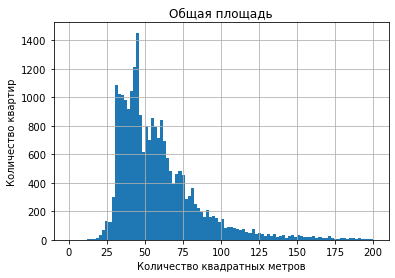

In [56]:
data.hist('total_area', bins=100, range=(0,200))
plt.title("Общая площадь")
plt.xlabel("Количество квадратных метров")
plt.ylabel("Количество квартир"); 
#Наиболее типичная площадь квартир - около 50кв.м. Основной массив квартир размером от примерно 35 до 70кв.м. 
#Есть также квартиры с нестандартными крупными площадьми.

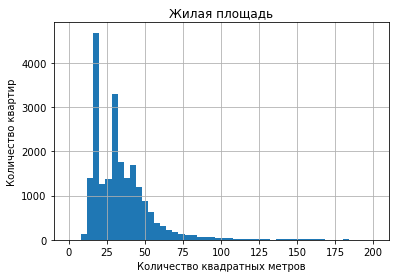

In [57]:
data.hist('living_area', bins=50, range=(0,200))
plt.title("Жилая площадь")
plt.xlabel("Количество квадратных метров")
plt.ylabel("Количество квартир");
#В графике видны провалы между пиками в примерно 20, 30 и 40кв.м. 
#Вероятно они обозначают деление квартир на одно-, двух- и трехкомнатные.
#Основная часть квартир обладает жилой площадью от примерно 20 до 40кв.м. Есть аномалии: квартиры с очень большой жилой площадью.

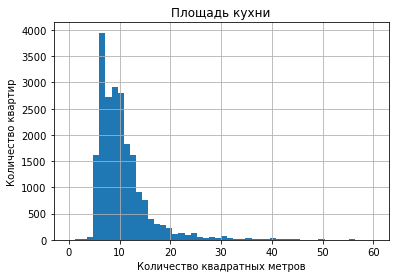

In [58]:
data.hist('kitchen_area', bins=50, range=(0,60))
plt.title("Площадь кухни")
plt.xlabel("Количество квадратных метров")
plt.ylabel("Количество квартир");
#Стандартная площадь кухни - около 7 метров. Большинство кухонь занимают площади от примерно 6 до 11кв.м.
#Есть немногочисленные квартиры с кухнями больше 20кв.м.

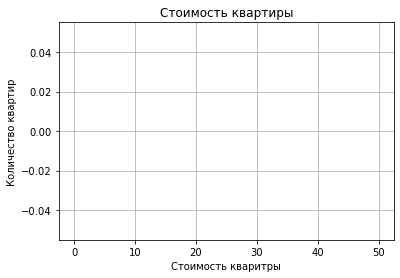

In [59]:
data.hist('last_price',  bins=100, range=(0,50))
plt.title("Стоимость квартиры")
plt.xlabel("Cтоимость кваритры")
plt.ylabel("Количество квартир");
#Наиболее распространённая цена за квартиру - около 4,5 млн. Стоимость обычно варьируется от примерно 3млн. до 7 млн. 
#Немногие квартиры дороже 12млн.

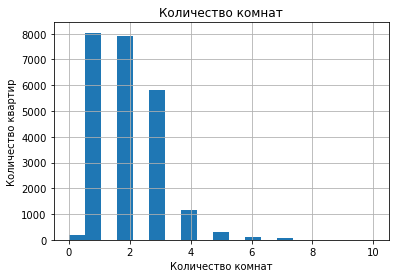

In [60]:
data.hist('rooms', bins=data['rooms'].max(), range=(0,10))
plt.title("Количество комнат")
plt.xlabel("Количество комнат")
plt.ylabel("Количество квартир");
#В данном датафрейме больше всего 1- и 2хкомнатных квартир. Типичные квартиры имеют от 1 до 3 комнат.
#Крайне редко встречаются квартиры с количеством комнат больше 5.

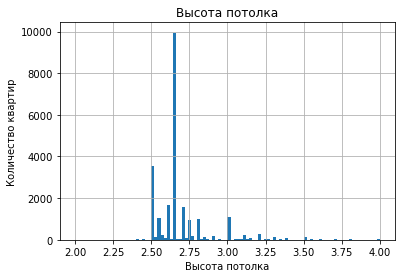

In [61]:
data.hist('ceiling_height', bins=100, range=(2,4))
plt.title("Высота потолка")
plt.xlabel("Высота потолка")
plt.ylabel("Количество квартир");
#Наиболее распространённая высота потолков - 2,6м. Как правило, высота потолков варьируется от примерно 2,5 до 2,7.
#Крайне редко встречаются потолки ниже 2,4 метра и выше 3,1.

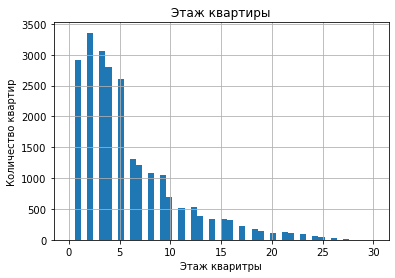

In [62]:
data.hist('floor', bins=50, range=(0,30))
plt.title("Этаж квартиры")
plt.xlabel("Этаж кваритры")
plt.ylabel("Количество квартир");
#Есть много квартир на 1ом этаже, а больше всего в диапозоне с 2 до 8 этажа. Квартиры выше 20 этажа редки.

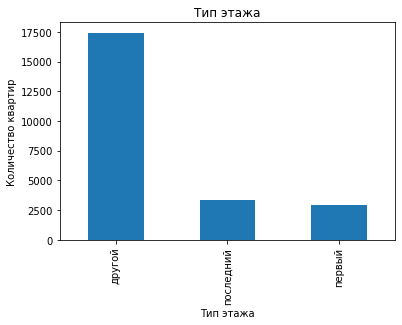

In [63]:
data['floor_type'].value_counts().plot(kind='bar')
plt.title("Тип этажа")
plt.xlabel("Тип этажа")
plt.ylabel("Количество квартир");
#На первом и последних этажах продаётся примерно одинаковое количество квартир. Гораздо больше квартир продаются на других этажах.

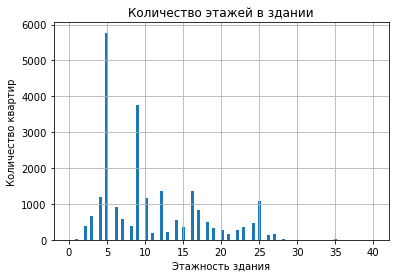

In [88]:
data.hist('floors_total', bins=100, range=(0, 40))
plt.title("Количество этажей в здании")
plt.xlabel("Этажность здания")
plt.ylabel("Количество квартир");
#Есть пики: 5 и 9. Вероятно, это говорит о том, что большинство квартир на рынке недвижимости расположены в пяти- и девятиэтажках.
#Крайне редко встречаются здания ниже 4х этажей и выше 25.

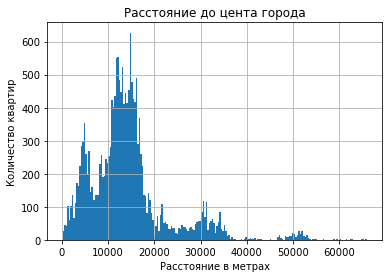

In [89]:
data.hist('cityCenters_nearest', bins=200)
plt.title("Расстояние до цента города")
plt.xlabel("Расстояние в метрах")
plt.ylabel("Количество квартир");
#Основная часть квартир расположена на удалении от 10 до 16км от центра. Квартир, удаленных на более чем 20км, мало.
#Однако есть небольшое увеличение количества продаваемых квартир в 30 и 50км от центра. Вероятно речь идет о новостройках в новых районах.
#Крайне редко встречаютс квартиры, удалённые от центра на более чем 60 км.

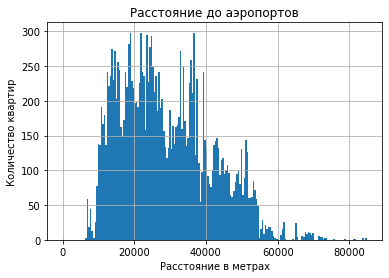

In [90]:
data.hist('airports_nearest', bins=200)
plt.title("Расстояние до аэропортов")
plt.xlabel("Расстояние в метрах")
plt.ylabel("Количество квартир");
#Основная часть квартир расположена в примерно 15-38км от аэропортов.
#Крайне мало кваритр расположено в менее 10 и в более 55 км от аэропортов.

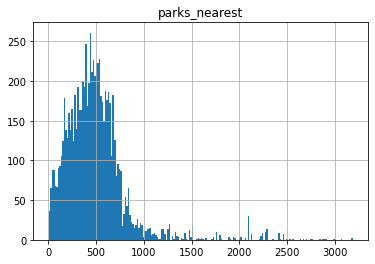

In [67]:
data.hist('parks_nearest', bins=200)
plt.title("Расстояние до парка")
plt.xlabel("Расстояние в метрах")
plt.ylabel("Количество квартир");
#Типичное растояние от парка - 300-600метров. Квартир, удалённых от парков на более 1000метров, мало.

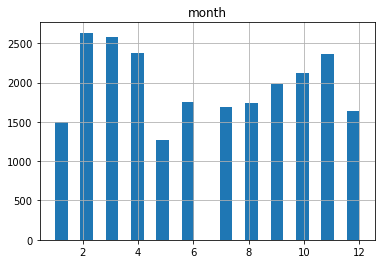

In [68]:
data.hist('month', bins = 24)
plt.title("Месяц публикации объявления о продаже")
plt.xlabel("Месяц")
plt.ylabel("Количество квартир");
#На гистограмме хорошо видно, что наименьшее число объявлений публикуется в праздничные месяцы: декабрь, январь и май.
#Наибольшее число публикаций приходится на период с февраля по апрель. 
#Летом количество публикациий примерно одинаковое. Осенью - продолжает расти вплоть до декабря.

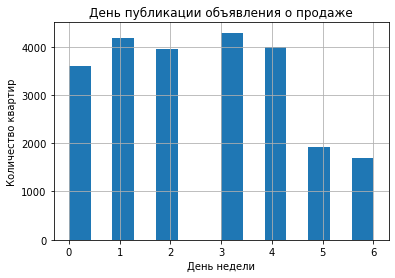

In [91]:
data.hist('weekday', bins = 14)
plt.title("День публикации объявления о продаже")
plt.xlabel("День недели")
plt.ylabel("Количество квартир");
#Из гистограммы хорошо видно, что по выходным публикуется в два раза меньше объявлений.
#В будние дни публикуется примерно одинаковое количество объявлений.

**Гистограммы столбцов:**

Гистограммы по всем числовым столбцам (кроме month) демонстрируют либо 1 пик в форме колокола, либо пик, смещенный влево. И то, и то соответствует распределению Пуассона, следовательно данные в целом достоверные. 

Столбец month отличается по форме от нормального распределения, потому что отражает социокультурные особенности финансового года в России.

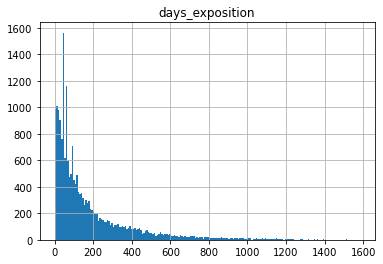

In [70]:
#Строим гистограмму для days_exposition
data.hist('days_exposition', bins=200)
plt.title("Количество дней в продаже")
plt.xlabel("Количество дней")
plt.ylabel("Количество квартир"); 

In [71]:
#Подсчитываем среднее арифмитическое.
data['days_exposition'].mean() 

180.82599990232944

In [72]:
#Подсчитываем медиану.
data['days_exposition'].median() 

95.0

In [73]:
#Выводим остальные описательные характеристики.
data['days_exposition'].describe() 

count    20477.000000
mean       180.826000
std        219.733154
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Столбец days_exposition:**

Данный столбец показывает, сколько дней квартира находится в продаже, прежде чем быть проданной. 

Четверть квартир была продана за полтора месяца, половина - за 3 месяца, три четверти - за менее чем 8 месяцев. Однако среднее арифметическое равно 6 месяцам. Это объясняется наличием значительного числа аномальных случаев: некоторые квартиры находятся в продаже очень долго, рекордсмен - 1580 дней.

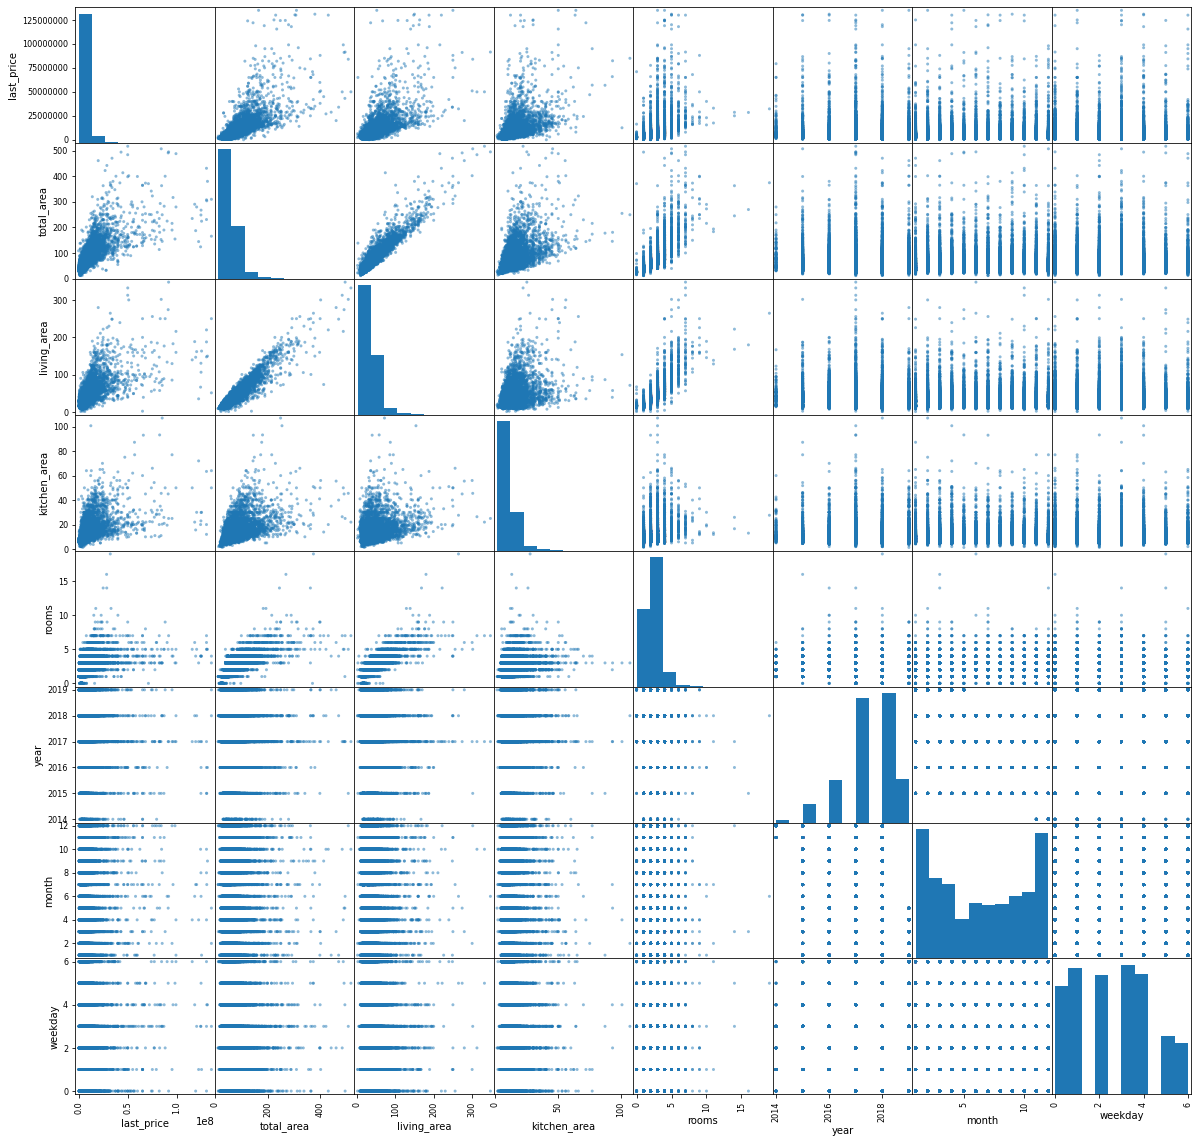

In [74]:
#Для того, чтобы изучить корреляцию цены  и нескольких величин, можно использовать матрицу диаграмм рассеяния.
pd.plotting.scatter_matrix(data[['last_price','total_area','living_area', 'kitchen_area','rooms','floor_type', 'year', 'month', 'weekday']],figsize=(20,20));
#Матрица показывает, что есть положительная зависимость между ценой квартиры и её общей площадью, жилой площадью, площадью кухни и количеством комнат.
#Явной связи между ценой и годом, месяцем или днём недели не видно.

**Факторы, более всего влияющие на полную стоимость квартиры:**

Мы изучили зависимость цены квартиры от нескольких факторов с помощью матрицы диаграмм рассеяния. 

По результатам исследования можно сделать вывод, что более всего на стоимость квартиры влияет её общая площадь. На втором месте по значению - площадь жилого пространства. Также обнаружены более слабые положительные связи между ценой и площадью кухни, а также количеством комнат.

Корреляции между ценой и годом, месяцем, а также днём недели не обнаружены.

In [75]:
#Строим сводную таблицу с указанием количества объявлений в населённом пункте и средней цены за 1 кв.м. 
#Выводим 10 наиболее популярных населённых пунктов.
top_ten = data.pivot_table(index='locality_name', values='unit_price', aggfunc=['count','mean']).sort_values(('count', 'unit_price'), ascending=False).head(10)
top_ten.columns

MultiIndex([('count', 'unit_price'),
            ( 'mean', 'unit_price')],
           )

In [76]:
top_ten
#Выведем полученный датафрейм.

,count,mean
,unit_price,unit_price
locality_name,,
Санкт-Петербург,15682,114010.323218
поселок Мурино,554,85656.214377
поселок Шушары,440,78677.364217
Всеволожск,398,68654.473986
Пушкин,369,103125.819291
Колпино,338,75424.579098
поселок Парголово,327,90175.913458
Гатчина,306,68757.678644


In [77]:
#Отсортируем полученный датафрейм по средней цене квадратного метра.
top_ten.sort_values(by=( 'mean', 'unit_price'), ascending=False)
#Из 10 лидеров наиболее дорогой метр у Санкт-Петербурга, наиболее дешевый - у Выборга.

,count,mean
,unit_price,unit_price
locality_name,,
Санкт-Петербург,15682,114010.323218
Пушкин,369,103125.819291
деревня Кудрово,299,92473.547576
поселок Парголово,327,90175.913458
поселок Мурино,554,85656.214377
поселок Шушары,440,78677.364217
Колпино,338,75424.579098
Гатчина,306,68757.678644


**Средняя цена на квадратный метр в 10 самых популярных населённых пунктах:**

Наиболее дорогая недвижимость в Санкт-Петербурге, наиболее дешевая (почти в два раза) - в Выборге. 
В Парголово и Кудрово, а также в Гатчине и Всеволожске разница в цене на квадратный метр - незначительная.
Прямой зависимости цены на квадратный метр от количества предложений в населённом пункте не наблюдается.

In [78]:
#Отбираем квартиры только в Санкт-Петербурге.
spb = data[data['locality_name']=='Санкт-Петербург'] 

In [79]:
#Формируем сводную таблицу с указанием средней цены каждого километра до центра города.
spb_pivot = spb.pivot_table(index='city_center_km', values='unit_price', aggfunc='mean').reset_index()

In [80]:
#Выводим полученный датафрейм.
spb_pivot 

,city_center_km,unit_price
0,0.0,231767.956010
1,1.0,158979.656902
2,2.0,153481.961501
3,3.0,121225.876844
4,4.0,128850.854610
5,5.0,138127.371049
6,6.0,148806.209541
7,7.0,156176.879664
8,8.0,124360.448297
9,9.0,113131.041911


In [81]:
#Отсоритруем полученный датафрейм по стоимости 1 кв.м.
spb_pivot.sort_values(by='unit_price', ascending=False).reset_index(drop=True)
#Из полученной таблицы видно, что индексы от 0 до 9 занимают километры первой десятки, расположенные не по порядку.
#При этом разница в цене одного метра незначительна - от нескольких тысяч до нескольких сотен.
#Исключение составляет 27 километр, который неожиданно оказался на 7 месте. Это требует проверки.
#После 10 индекса идут километры второй и третьей десятки. 
#Они расположены не по порядку, но разница в цене между ними также незначительна. Поэтому этой "беспорядочностью" можно пренебречь.

,city_center_km,unit_price
0,0.0,231767.956010
1,1.0,158979.656902
2,7.0,156176.879664
3,2.0,153481.961501
4,6.0,148806.209541
5,5.0,138127.371049
6,27.0,132115.709459
7,4.0,128850.854610
8,8.0,124360.448297
9,3.0,121225.876844


In [82]:
#Выясним загадку 27 километра. 
#Попробуем посмотреть, на каких километрах расположено меньше всего и больше всего квартир.
spb.pivot_table(index='city_center_km', values='unit_price', aggfunc=['count','mean']).sort_values(('count', 'unit_price'), ascending=False)
#Видно, что чаще всего продаются квартиры, расположенные в 10-17 км от центра. Видимо, это стандартное удаление для жилых районов.
#На 27 километре расположено всего лишь два объекта недвижимости, зато очень дорогих, поэтому они так и влияют на данные. Их необходимо удалить.

,count,mean
,unit_price,unit_price
city_center_km,,
12.0,1604,107482.319407
15.0,1567,104252.468473
13.0,1455,108162.955368
14.0,1277,104264.261610
16.0,1264,100567.059959
11.0,1175,108655.307546
5.0,912,138127.371049
17.0,883,96597.652408


In [83]:
#Удалим из датафрейма километры, на которых расположено незначительное количество объектов.
standard_km = spb[spb['city_center_km']!=27]

In [84]:
#Формируем сводную таблицу с указанием средней цены каждого километра до центра города.
standard_km_pivot = standard_km.pivot_table(index='city_center_km', values='unit_price', aggfunc='mean').sort_values(by='unit_price', ascending = False).reset_index()

In [85]:
#Выведем новый датафрейм без выбросов.
standard_km_pivot

,city_center_km,unit_price
0,0.0,231767.956010
1,1.0,158979.656902
2,7.0,156176.879664
3,2.0,153481.961501
4,6.0,148806.209541
5,5.0,138127.371049
6,4.0,128850.854610
7,8.0,124360.448297
8,3.0,121225.876844
9,9.0,113131.041911


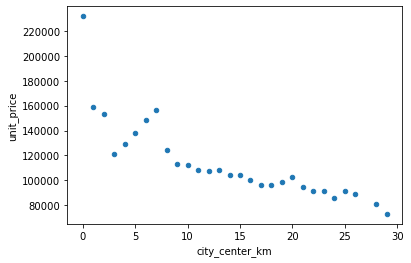

In [86]:
#Для наглядности можно построить график: есть выбросы, особенно в "ближайшей" части, 
#но в целом видна тенденция - чем дальше от центра, тем дешевле.
standard_km_pivot.plot.scatter(x='city_center_km', y='unit_price'); 

In [87]:
#Наконец можно проверить наличие прямой линейной связи с помощью коэффициента Пирсона.
standard_km['city_center_km'].corr(standard_km['unit_price'])
#Коэффициент говорит о наличии слабой отрицательной линейной связи.

-0.34121913415696803

**Влияние близости к центру города на стоимость квартиры:**

Анализ данных показал, что, начиная примерно с 7 км от центра города, есть общая тенденция к уменьшению цены на недвижимость по мере удаления от центра. 

Для недвижимости, расположенной от 1 до 7 км от центра, влияние фактора близости к центру также прослеживается, но не так сильно. Вероятно, это объясняется тем, что на стоимость квартир также влияют третие факторы, например, состояние дома и др.

### Общий вывод

В ходе данного проекта мы изучили датафрейм real_estate_data.csv.

Мы нашли несовершенства в данных: наличие пропущенных значений, аномалии.

Было проведена предобработка данных. По возможности были заменены пропущенные значения. Там, где это было необходимо, были изменены типы данных столбцов. Также были удалены неявные дубликаты и аномалии.

Было сформировано и добавленно несколько уточняющих столбцов.

С помощью гистограмм были исследованы основные столбцы, благодаря чему были определены типичная общая площадь, типичная жилая площадь, площадь кухни, цена, количество комнат, стандартное расстояния до центра, парков и аэропортов и др.

Отдельно был исследован столбец, отображающий количество дней в продаже. Было установлено, что, как правило, продажа квартиры занимает около 3х месяцев.

Также мы изучили факторы, которые влияют на цену квартиры и определили, что наибольшее влияние оказывает общая площадь квартиры. Значительное влияние также оказывают жилая площадь, площадь кухни и количество комнат. Год, месяц и день выставления на продажу не оказывают влияния.

Мы также изучили цены на недвижимость в самых популярных населённых пунктах и выяснили, что Санкт-Петербург лидирует по ценам на недвижимость.

В конце мы исследовали, как удалённость от центра города влияет на стоимость квартиры, и выяснили, что, хотя прямая линейная связь слабая, в целом стоимость квартиру дешевеет по мере удаления от центра.
